Import the libraries and format the data. Then display the data ontop of eachother. 

In [ ]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
min_wage = pd.read_csv("federalMinimumWage.csv")
min_wage.columns = min_wage.columns.str.strip()

# Convert Effective Date → datetime
min_wage["Effective Date"] = (
    min_wage["Effective Date"]
    .astype(str)
    .str.strip()
)
min_wage["Effective Date"] = pd.to_datetime(
    min_wage["Effective Date"],
    format= "%b %d %Y",
    errors="coerce"
)

# Remove $ signs and convert to float
wage_cols = ["interstateWage", "stateWage", "nonFarmWage", "farmWage"]

for col in wage_cols:
    min_wage[col] = (
        min_wage[col]
        .astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .replace("0", np.nan)
        .astype(float)
    )

# Select the interstateWage as the federal wage, and readd it as a new column
min_wage["federalWage"] = min_wage["interstateWage"]


unemp = pd.read_csv("unemploymentRate.csv")
unemp.columns = unemp.columns.str.strip()

# Convert Effective Date → datetime
unemp["observation_date"] = (
    unemp["observation_date"]
    .astype(str)
    .str.strip()
)
unemp["observation_date"] = pd.to_datetime(
    unemp["observation_date"],
    format="%Y-%m-%d",
    errors="coerce"
)


-+
# Convert unemployment rate to float
unemp["UNRATE"] = unemp["UNRATE"].astype(float)

# Run this BEFORE the pd.to_datetime step
print("--- Column Names and Data Types Before Conversion ---")
print(unemp.info())
print("\n--- First 5 observation_date values (raw) ---")
# Use .head(10) to see a few more, just in case the first few are bad
print(unemp["observation_date"].head(5))


ValueError: cannot insert observation_date, already exists

In [ ]:
plt.figure(figsize=(14, 7))

# Plot unemployment rate
plt.plot(
    unemp["observation_date"],
    unemp["UNRATE"],
    label="Unemployment Rate (%)",
    linewidth=2
)

# Add vertical lines for minimum wage changes
for idx, row in min_wage.iterrows():
    date = row["Effective Date"]
    wage = row["federalWage"]
    plt.axvline(date, color="red", linestyle="--", alpha=0.5)
    plt.text(
        date,
        unemp["UNRATE"].max() * 0.95,  # place text near top
        f"${wage:.2f}",
        rotation=75,
        verticalalignment="top",
        fontsize=8,
        color="red"
    )

# -------------------------------
# Formatting
# -------------------------------
plt.title("Unemployment Rate Over Time with Federal Minimum Wage Changes")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid(alpha=0.2)
plt.legend()
plt.tight_layout()

plt.show()

NameError: name 'mdates' is not defined

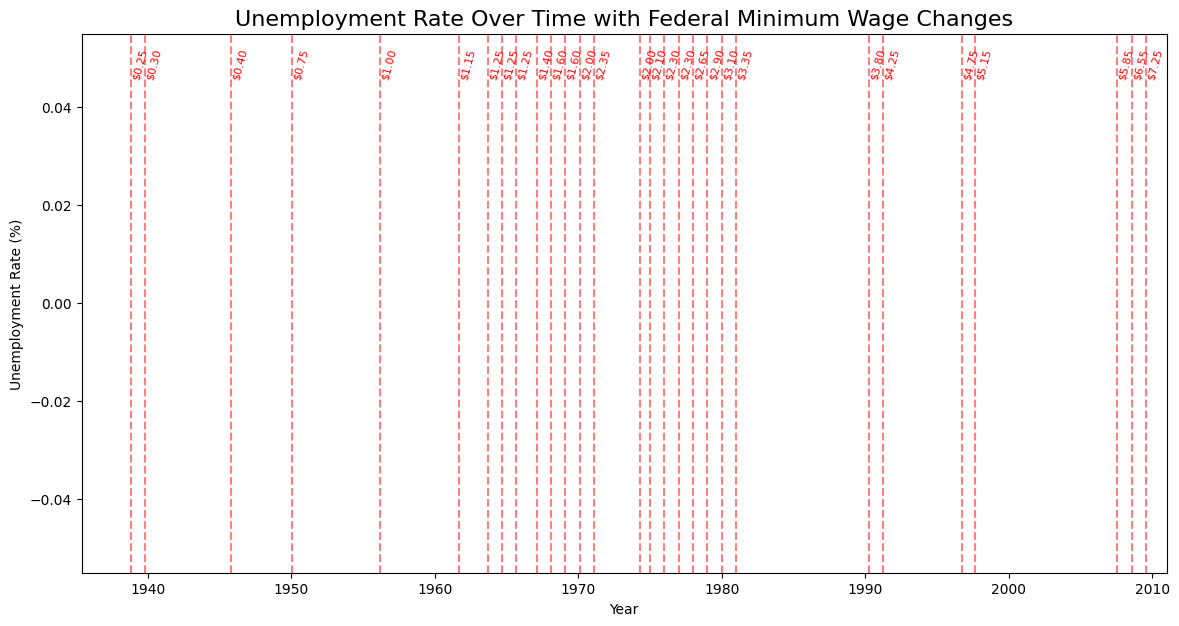

In [27]:
plt.figure(figsize=(14, 7))

# 1. Plot unemployment rate (This should now appear as the dates are datetime objects)
plt.plot(
    unemp["observation_date"],
    unemp["UNRATE"],
    label="Unemployment Rate (%)",
    linewidth=2,
    color="blue"  # Added color for clarity
)

# Get the current y-axis limits (needed for dynamic text placement)
y_min, y_max = plt.ylim()

# 2. Add vertical lines for minimum wage changes
for idx, row in min_wage.iterrows():
    date = row["Effective Date"]
    wage = row["federalWage"]
    
    # Check if the date and wage are valid (not NaT/NaN) before plotting
    if pd.notna(date) and pd.notna(wage):
        plt.axvline(date, color="red", linestyle="--", alpha=0.5)
        
        # Calculate text placement at 95% of the current y-axis max
        text_y_pos = y_max * 0.95
        
        plt.text(
            date,
            text_y_pos,
            f"${wage:.2f}",
            rotation=75,
            verticalalignment="top",
            fontsize=8,
            color="red"
        )

# -------------------------------
# Formatting and Fixing Whitespace
# -------------------------------
plt.title("Unemployment Rate Over Time with Federal Minimum Wage Changes", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")

# **FIX 1: Remove Huge Whitespace by setting explicit X-limits**
# Set the x-axis limits to the min/max of the unemployment observation dates
valid_dates = unemp["observation_date"].dropna()

if valid_dates.empty:
    print("WARNING: The 'observation_date' column is empty or contains no valid dates. X-axis limits were not set.")
else:
    plt.xlim(valid_dates.min(), valid_dates.max())


# **FIX 2: Improve Date Formatting on the X-axis**
# Use a formatter for better year display
ax = plt.gca() # Get the current axes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optionally, set a locator to put ticks at regular intervals (e.g., every 5 years)
ax.xaxis.set_major_locator(mdates.YearLocator(5))


plt.grid(alpha=0.4)
plt.legend()
plt.tight_layout()

plt.show()